In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ch4_scores400.csv to ch4_scores400.csv


In [4]:
df = pd.read_csv ('/content/ch4_scores400.csv')
scores = np.array (df[ 'score'])

In [5]:
from scipy import stats
stats.describe ( scores)

DescribeResult(nobs=400, minmax=(23, 100), mean=69.53, variance=207.18706766917293, skewness=-0.19671436765427588, kurtosis=-0.2307738549492897)

In [6]:
p_mean = np.mean (scores)
p_var = np.var (scores)

p_mean , p_var

(69.530, 206.669)

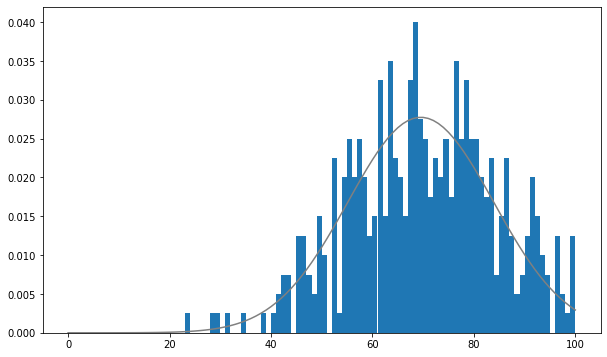

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm (p_mean, np.sqrt (p_var))
ax.plot (xs, rv.pdf(xs), color = 'gray')
ax.hist ( scores, bins = 100, range= (0, 100), density = True )

plt.show()

In [8]:
# 무작위추출한 20명의 표본 데이터

np.random.seed(0)
n = 20
sample = np.random.choice (scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [9]:
# 표본 크기가 20개인 표본 데이터를 1만 개 준비
np.random.seed (1111)
n_samples = 10000
samples = np.random.choice (scores, (n_samples, n))


In [10]:
for i in range(5):
    s_mean = np.mean (samples[i])
    print (f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 67.000
2번째 표본평균: 72.850
3번째 표본평균: 69.200
4번째 표본평균: 64.450
5번째 표본평균: 72.650


In [11]:
 # 모평균, 모분산 (population mean)
p_mean , p_var

(69.530, 206.669)

In [12]:
# 1만개의 표본 데이터 각각에 대해 표본평균을 구하고, 그 평균을 계산
sample_means = np.mean (samples, axis=1)
np.mean (sample_means)
#추정량의 기댓값이 추측하려는 모수가 되는 성질: 불편성 (Unbiasedness)

69.538

In [13]:
# 표본 크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질; 일치성(Consistency)
np.mean(np.random.choice(scores, int(1e6)))

69.543

In [14]:
s_mean = np.mean (sample)
s_mean

70.400

모분산의 점추정

In [15]:
for i in range (5):
    s_var = np.var (samples[i])
    print(f'{i+1}번째 표본분산: {s_var:3f}')

1번째 표본분산: 116.800000
2번째 표본분산: 162.927500
3번째 표본분산: 187.060000
4번째 표본분산: 149.147500
5번째 표본분산: 111.527500


In [16]:
#표본분산이 모분산의 불편추정량(Unbiased Estimator)가 되는지 대수의 법칙으로 확인

sample_vars = np.var(samples,axis=1)
np.mean (sample_vars)

196.344

In [17]:
p_var
# 아무래도 표본분산은 모분산의 볼편추정량이 아닌 것 같음

206.669

In [18]:
#불편분산 (Unbiased Variance) 는 표본분산엣 나누는 수 n을 n-1로 하는 식으로 계산됨
#표본평균은 자유도가 n이지만, 분산의 경우, 식 안에서 각 변수가 평균을 만족해야 하는 제약이 생김
#이 때문에 자유도가 하나 감소되어 n-1

sample_unbiased_vars= np.var (samples, axis=1, ddof=1)
np.mean (sample_unbiased_vars)

206.678

In [19]:
#표본크기 n을 100만으로 하여 불편분산이 모분산의 불편추정량이 되는지 확인
np.var (np.random.choice (scores, int(1e6)), ddof=1)

207.083

In [20]:
#A학생의 20개 포본으로 불편분산 계산
u_var = np.var (sample, ddof= 1)
u_var

158.253

# **신뢰구간**

모분산을 알고 있을 때 모평균의 신뢰구간

In [21]:
# 20개 표본 데이터로 모평균 95% 신뢰구간을 구함
# (lower confidence level, upper confidence level) 을 구함

rv= stats.norm()
lcl = s_mean - rv.isf (0.025) * np.sqrt ( p_var/n)
ucl = s_mean - rv.isf (0.975) * np.sqrt ( p_var/n)

lcl, ucl

(64.100, 76.700)

# 앞 코드 참조

# 표본 크기가 20개인 표본 데이터를 1만 개 준비
np.random.seed (1111)

n_samples = 10000

samples = np.random.choice (scores, (n_samples, n))


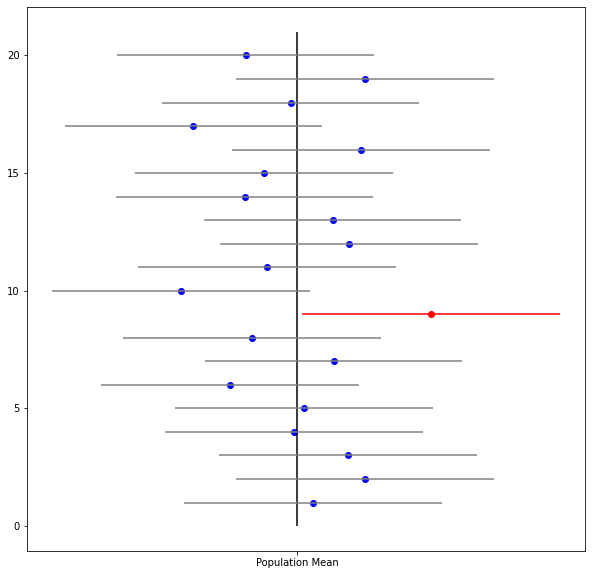

In [22]:
# 신뢰구간 계산을 20번 수행해서, 그 중 몇 번 모평균을 포함하고 있는지 그려봄

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm ()
n_samples =20
ax.vlines (p_mean, 0 , 21)

for i in range( n_samples):
    sample_ = samples [i]
    s_mean_ = np.mean (sample_ )
    lcl = s_mean_ - rv.isf (0.025) * np.sqrt ( p_var/n)
    ucl = s_mean_ - rv.isf (0.975) * np.sqrt ( p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter (s_mean_, n_samples-i, color = 'blue')
        ax.hlines (n_samples-i, lcl, ucl, colors= 'gray')
    else:
        ax.scatter (s_mean_, n_samples-i, color = 'red')
        ax.hlines (n_samples-i, lcl, ucl, color = 'red')
ax.set_xticks ([p_mean])
ax.set_xticklabels (['Population Mean'])

plt.show()


In [23]:
rv = stats.norm ()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean (sample_)
    lcl = s_mean_ - rv.isf (0.025) * np.sqrt ( p_var/n)
    ucl = s_mean_ - rv.isf (0.975) * np.sqrt ( p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)
    

0.951

# **정규분포의 모분산 구간추정**
 **모집단으로 정규분포를 가정하고
, 모평균을 모르는 경우**

표본평균을 표준화하여 표준정규분포를 따르는 확률변수로 변환한 것처럼, 표본분산(s^2)도 변환을 하여 대표적 확률분포를 따르는 확률변수를 생성
Y = (n-1) s^2 /sigma^2
Y ~ chi^2 (n-1)

In [24]:
# 1만 개 표본 데이터에서 Y의 표본 데이터 생성
sample_y = sample_unbiased_vars *(n-1) /p_var
print (len(sample_y) )
sample_y

10000


array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

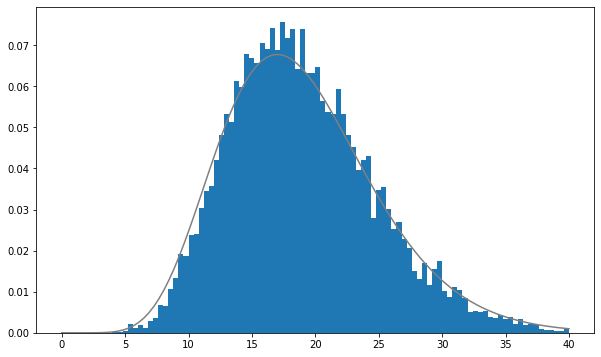

In [25]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace( 0, 40, 100)
rv = stats.chi2 ( df =n-1)
ax.plot (xs, rv.pdf(xs), color = 'gray')
hist, _, _ = ax.hist ( sample_y, bins = 100, range= (0, 40), density = True )

plt.show()

20개의 표본데이터로 95% 신뢰구간 구하기

X1, X2, ... ,Xn ~ iid N(mu, simgma^2)
모평균이 알려지지 않았을 때, 100(1-alpha) %의 모분산의 신뢰구간은


In [26]:
rv = stats.chi2( df = n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl


(91.525, 337.596)

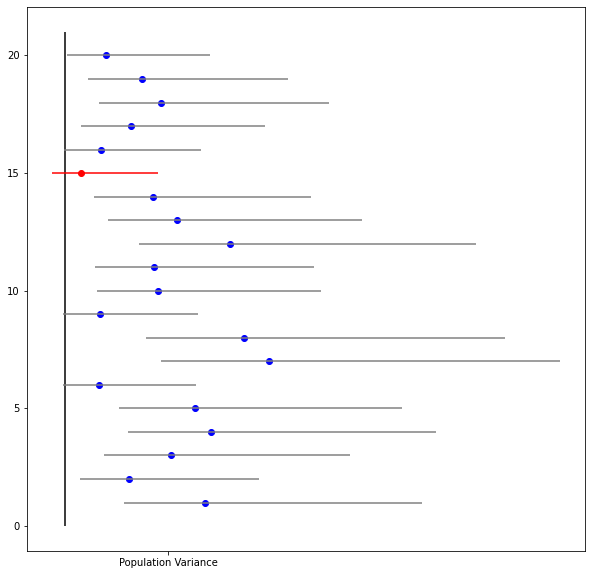

In [27]:
# 모분산의 95% 신뢰구간의 이미지를 보다 명확하게 하기 위해,
# 신뢰구간 계산을 20번 수행해서, 그 중 몇 번 모분산을 포함하고 있는지 그려봄

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2 (df = n-1)
n_samples =20
ax.vlines (p_mean, 0 , 21)

for i in range( n_samples):
    sample_ = samples [i]
    u_var_ = np.var (sample_ , ddof=1 )
    lcl = (n-1) * u_var_ / rv.isf (0.025) 
    ucl = (n-1) * u_var_ / rv.isf (0.975) 
    if lcl <= p_var <= ucl:
        ax.scatter ( u_var_ , n_samples-i, color = 'blue')
        ax.hlines (n_samples-i, lcl, ucl, colors= 'gray')
    else:
        ax.scatter ( u_var_ , n_samples-i, color = 'red')
        ax.hlines (n_samples-i, lcl, ucl, color = 'red')
ax.set_xticks ([p_var])
ax.set_xticklabels (['Population Variance'])

plt.show()

In [28]:
rv = stats.chi2 ( df = n-1)
cnt = 0

for sample_ in samples:
    u_var_ = np.var ( sample_, ddof=1 )
    lcl = (n-1) * u_var_ / rv.isf (0.025) 
    ucl = (n-1) * u_var_ / rv.isf (0.975) 
    if lcl <= p_var <= ucl:
        cnt += 1
cnt / len(samples)

#신뢰구간의 약 96%가 모분산을 포함하고 있음을 확인

0.964

# **모분산을 모르는 경우: 정규분포의 모평균 구간추정**

**모분산을 모르므로 모분산 sigma^2 대신 그 추정량인 불편분산 s^2를 사용한 sqrt(s^2/n) 을 표준오차로 대신 사용**

In [29]:
##20개 표본으로 모평균의 구간추정

rv = stats.t( df= n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt( u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt( u_var/n)

lcl, ucl

(64.512, 76.288)

In [30]:
# 모평균이 구간내에 있는지 확인
p_mean

69.530

# **베르누이 분포의 모평균 구간추정**

In [31]:
from google.colab import files
uploaded = files.upload()


Saving ch10_enquete.csv to ch10_enquete.csv


In [32]:
enquete_df = pd.read_csv ('/content/ch10_enquete.csv')
enquete = np.array (enquete_df['known'])
n= len(enquete)
print (n)
enquete [:10]

1000


array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [33]:
ber_s_mean = enquete.mean()
ber_s_mean

0.709

In [38]:
# 모평균의 95% 신뢰수준의 신뢰구간 추정

rv = stats.norm()

lcl = ber_s_mean - rv.isf(0.025) * np.sqrt ( ber_s_mean * (1 - ber_s_mean)/n )
ucl = ber_s_mean - rv.isf(0.975) * np.sqrt ( ber_s_mean * (1 - ber_s_mean)/n )

lcl, ucl

(0.681, 0.737)

# **포아송 분포의 모평균 신뢰구간**

**모집단에 정규분포를 가정할 수 없는 예 **

어떤 사이트에 대한 1시간당 엑세스 수가 과거 72사건 분량이 들어 있는 데이터 사용
이 사이트에 대한 1시간당 평균 엑세스 수를 추정

In [42]:
from google.colab import files
uploaded = files.upload()

Saving ch10_access.csv to ch10_access.csv


In [44]:
n_access_df = pd.read_csv ('/content/ch10_access.csv')
n_access = np.array ( n_access_df['access number'])
n= len( n_access)
print (n)
n_access [:10]

72


array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8])

In [45]:
# 모평균 추정
# 포아송 분포에서의 기댓값과 분산 모두 lambda
# 따라서 표본평균의 기댓값은 lambda, 분산은 lambda/n

In [46]:
poi_s_mean = n_access.mean()
poi_s_mean

10.444

In [49]:
rv = stats.norm()
lcl = poi_s_mean - rv.isf(0.025) * np.sqrt( poi_s_mean/n )
ucl = poi_s_mean - rv.isf(0.975) * np.sqrt( poi_s_mean/n )

lcl , ucl

(9.698, 11.191)